In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

can_fly = [0, 2]  # airplane, bird
cannot_fly = [1, 3, 4, 5, 6, 7, 8, 9]  # automobile, cat, deer, dog, frog, horse, ship, truck

y_train_bin = np.isin(y_train, can_fly).astype(np.int32)
y_test_bin = np.isin(y_test, can_fly).astype(np.int32)

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train_bin = to_categorical(y_train_bin, 2)
y_test_bin = to_categorical(y_test_bin, 2)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 194s 1us/step


In [3]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


C:\Users\Adil\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [4]:
history = model.fit(x_train, y_train_bin, epochs=20, batch_size=64, validation_split=0.2)


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.7963 - loss: 0.4832 - val_accuracy: 0.8394 - val_loss: 0.3815
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.8426 - loss: 0.3772 - val_accuracy: 0.8618 - val_loss: 0.3535
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.8644 - loss: 0.3301 - val_accuracy: 0.8818 - val_loss: 0.3074
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.8800 - loss: 0.3007 - val_accuracy: 0.8730 - val_loss: 0.3108
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.8922 - loss: 0.2700 - val_accuracy: 0.8839 - val_loss: 0.2864
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9021 - loss: 0.2477 - val_accuracy: 0.8891 - val_loss: 0.2884
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9097 - loss: 0.2211 - val_accuracy: 0.8880 - val_loss: 0.2894
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9199 - loss: 0.1993 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Precision: 0.7196
Recall: 0.6340
F1 Score: 0.6741
Accuracy: 0.8774


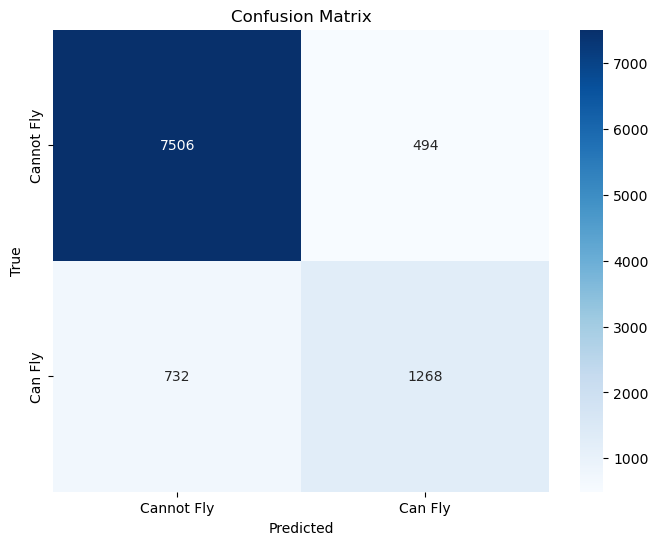

In [5]:
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test_bin, axis=1)

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Cannot Fly', 'Can Fly'], yticklabels=['Cannot Fly', 'Can Fly'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
